In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import json

In [3]:
df_raw = pd.read_csv('../data/raw/data_v1.csv', sep=';')
df_raw.head()

,WEB_PROPERTY_CODE,PRICE,PRICE_ADMIN_INCLUDED,AREA,LATITUDE,LONGITUDE,ANTIQUITY,CONSTRUCTION_YEAR,BUILT_AREA,PRIVATE_AREA,GARAGE,BATHROOMS,ROOMS,FLOOR,PROPERTY_TYPE,OPERATION_TYPE,STRATUM,BEDROOMS
0,192347534,3700000,3700000,92.00,4.694648,-74.036738,De 16 a 30 años,NaN,92.00,92.00,1,0,0,4.0,Apartamento,Arriendo,6,2
1,192778114,3200000,3200000,52.00,4.646481,-74.102364,De 1 a 8 años,NaN,52.00,0.00,1,2,0,5.0,Apartamento,Arriendo,4,1
2,10833499,2500000,2708000,47.57,4.738517,-74.067200,De 1 a 8 años,2019.0,47.57,47.57,1,1,1,12.0,Apartamento,Arriendo,5,1
3,192773341,5500000,6300000,198.00,4.686985,-74.044264,Más de 30 años,NaN,198.00,198.00,1,4,3,5.0,Apartamento,Arriendo,6,3
4,192735014,4600000,4600000,70.00,4.678992,-74.041622,De 16 a 30 años,NaN,70.00,70.00,1,2,0,3.0,Apartamento,Arriendo,6,2


In [4]:
y_column = ['PRICE']

numeric_features = [
    'AREA',
    'BUILT_AREA',
    'PRIVATE_AREA',
    'LATITUDE',
    'LONGITUDE',
    'FLOOR',
    'ROOMS',
    'BATHROOMS',
    'GARAGE',
]

categorical_features = [
    'ANTIQUITY',
    'STRATUM',
    'BEDROOMS'
]
all_features = numeric_features + categorical_features

df = df_raw.loc[:,y_column + all_features]

In [5]:
with open('../src/config.json', 'r') as f:
    config_dict = json.load(f)

y_column = config_dict['y_column']
numeric_features = config_dict['numeric_features']
categorical_features = config_dict['categorical_features']
all_features = numeric_features + categorical_features

### Primera Inspección

In [8]:
# Data Analysis and Quality Check
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]).T.map(lambda x: f"{x:,.0f}")

Dataset shape: (11602, 13)

Data types:
PRICE             int64
AREA            float64
BUILT_AREA      float64
PRIVATE_AREA    float64
LATITUDE        float64
LONGITUDE       float64
FLOOR           float64
ROOMS             int64
BATHROOMS         int64
GARAGE            int64
ANTIQUITY        object
STRATUM           int64
BEDROOMS          int64
dtype: object

Missing values:
PRICE             0
AREA              0
BUILT_AREA        7
PRIVATE_AREA      0
LATITUDE          0
LONGITUDE         0
FLOOR           160
ROOMS             0
BATHROOMS         0
GARAGE            0
ANTIQUITY       663
STRATUM           0
BEDROOMS          0
dtype: int64

Basic statistics:


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
PRICE,"11,602","18,746,871","900,826,328",0,"726,525","1,018,100","1,200,000","1,710,000","3,500,000","8,068,000","17,000,000","25,000,000","60,000,000","96,000,000,000"
AREA,"11,602",505,"38,532",0,10,25,32,46,74,154,280,400,900,"4,150,000"
BUILT_AREA,"11,595",505,"38,544",0,10,25,32,46,74,154,280,400,900,"4,150,000"
PRIVATE_AREA,"11,602",282,"17,651",0,0,0,0,27,57,120,248,360,781,"1,900,000"
LATITUDE,"11,602",5,0,0,5,5,5,5,5,5,5,5,5,8
LONGITUDE,"11,602",-74,1,-77,-74,-74,-74,-74,-74,-74,-74,-74,-74,0
FLOOR,"11,442",3,7,-1,0,0,0,0,1,4,7,10,18,603
ROOMS,"11,602",1,1,0,0,0,0,0,1,2,3,3,4,20
BATHROOMS,"11,602",2,1,0,0,0,1,1,2,3,4,5,6,10
GARAGE,"11,602",1,4,-3,0,0,0,0,1,2,3,3,6,127


In [9]:
for c in categorical_features:
    print(df[c].value_counts(dropna=False))
    print('-'*10)
print()
print("="*40)
print("Variables continuas")
print("="*40)
print()
for c in numeric_features:
    n_nans = df[c].isna().sum()
    if n_nans > 0:
        print(f"Total NaN in {c}: {n_nans} and {n_nans * 100 / len(df):,.2f}%")

ANTIQUITY
De 16 a 30 años    3285
De 1 a 8 años      2560
Más de 30 años     2021
De 9 a 15 años     2000
Menor a 1 año      1073
NaN                 663
Name: count, dtype: int64
----------
STRATUM
6      3502
3      3343
4      2630
5      1511
2       425
110     149
1        34
0         6
7         2
Name: count, dtype: int64
----------
BEDROOMS
2     3011
3     2852
0     2834
1     2199
4      595
5       81
6       13
9        4
7        4
8        3
12       2
10       2
14       1
20       1
Name: count, dtype: int64
----------

Variables continuas

Total NaN in BUILT_AREA: 7 and 0.06%
Total NaN in FLOOR: 160 and 1.38%


/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='PRICE', ylabel='Count'>

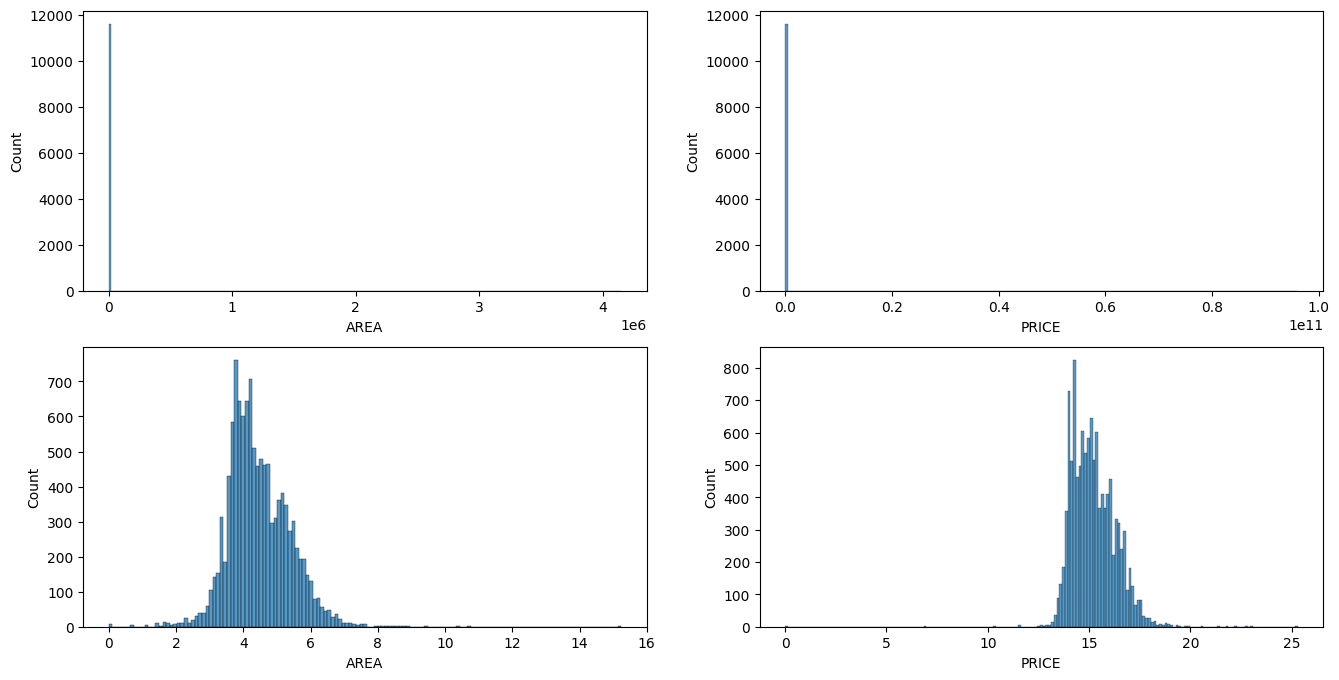

In [11]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC
fig, axes = plt.subplots(2, 2, figsize = (16,8))

sns.histplot(x = df['AREA'], ax = axes[0,0])
sns.histplot(x = df['PRICE'], ax = axes[0,1])
sns.histplot(x = np.log(df['AREA']), ax = axes[1,0])
sns.histplot(x = np.log(df['PRICE']), ax = axes[1,1])

/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


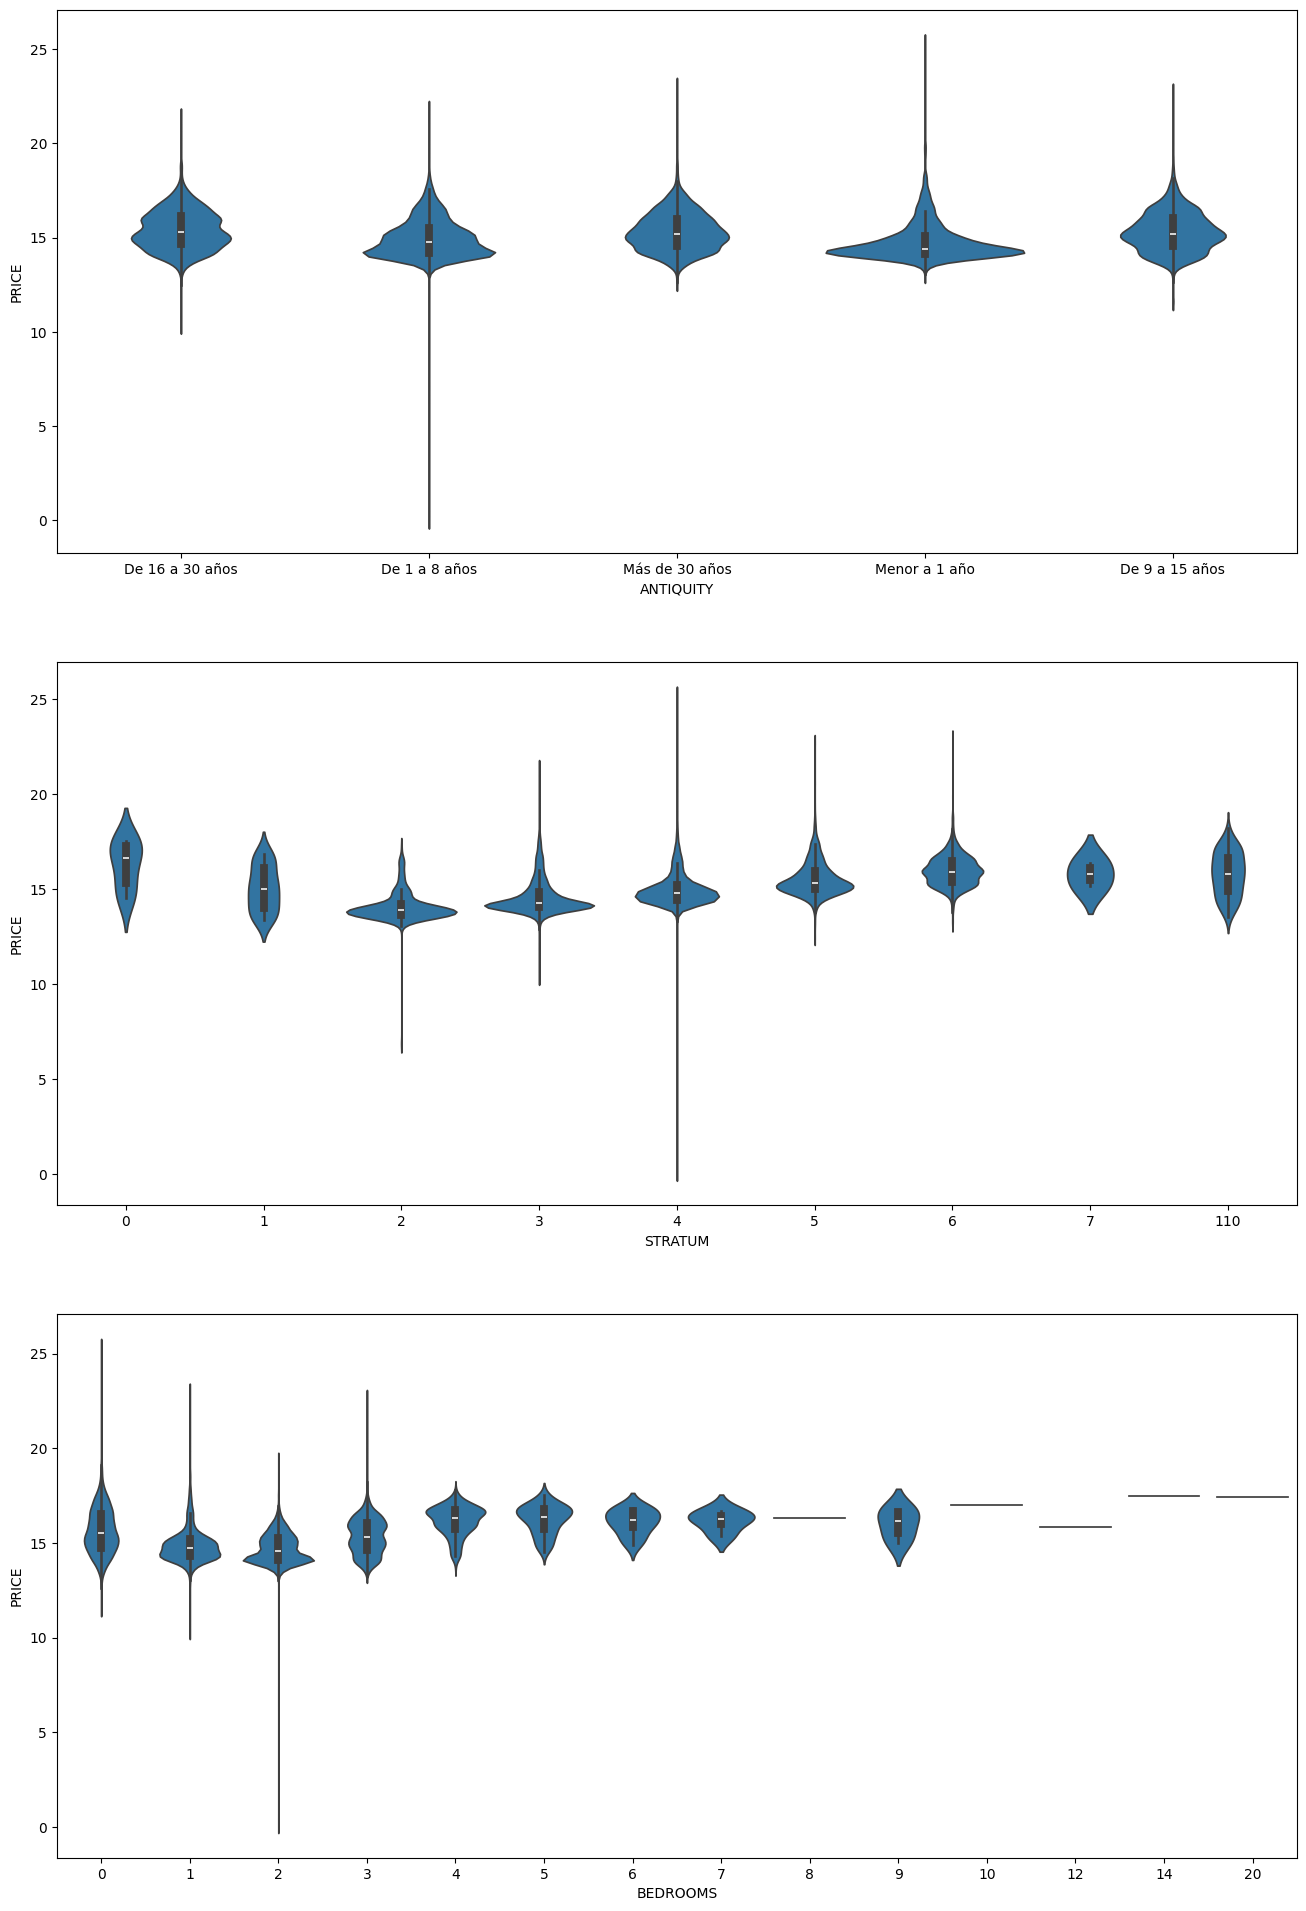

In [12]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC

fig, axes = plt.subplots(len(categorical_features), 1, figsize = (16, 8 * len(categorical_features)))
for i, var in enumerate(categorical_features):
    sns.violinplot(df, x = var, y = np.log(df['PRICE']), ax = axes[i])

### Filtros Manuales

In [13]:
# Categorical features can"t have NaN
for c in categorical_features:

    # Default Value for Nan numeric
    if pd.api.types.is_numeric_dtype(df[c]):
        df[c] = df[c].fillna(999)

    # Devault Value for Nan String
    elif pd.api.types.is_object_dtype(df[c]):
        df[c] = df[c].fillna('No se sabe')

df[categorical_features] = df[categorical_features].astype('category')

# Drop erroneous data
df = df[df['FLOOR'] != 202]
df = df[df['STRATUM'] != 101]

# Drop remaining NaN
df.dropna(inplace=True)
print(df.dtypes)
print(len(df))
df.head(3)


PRICE              int64
AREA             float64
BUILT_AREA       float64
PRIVATE_AREA     float64
LATITUDE         float64
LONGITUDE        float64
FLOOR            float64
ROOMS              int64
BATHROOMS          int64
GARAGE             int64
ANTIQUITY       category
STRATUM         category
BEDROOMS        category
dtype: object
11435


,PRICE,AREA,BUILT_AREA,PRIVATE_AREA,LATITUDE,LONGITUDE,FLOOR,ROOMS,BATHROOMS,GARAGE,ANTIQUITY,STRATUM,BEDROOMS
0,3700000,92.00,92.00,92.00,4.694648,-74.036738,4.0,0,0,1,De 16 a 30 años,6,2
1,3200000,52.00,52.00,0.00,4.646481,-74.102364,5.0,0,2,1,De 1 a 8 años,4,1
2,2500000,47.57,47.57,47.57,4.738517,-74.067200,12.0,1,1,1,De 1 a 8 años,5,1


/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='PRICE', ylabel='Count'>

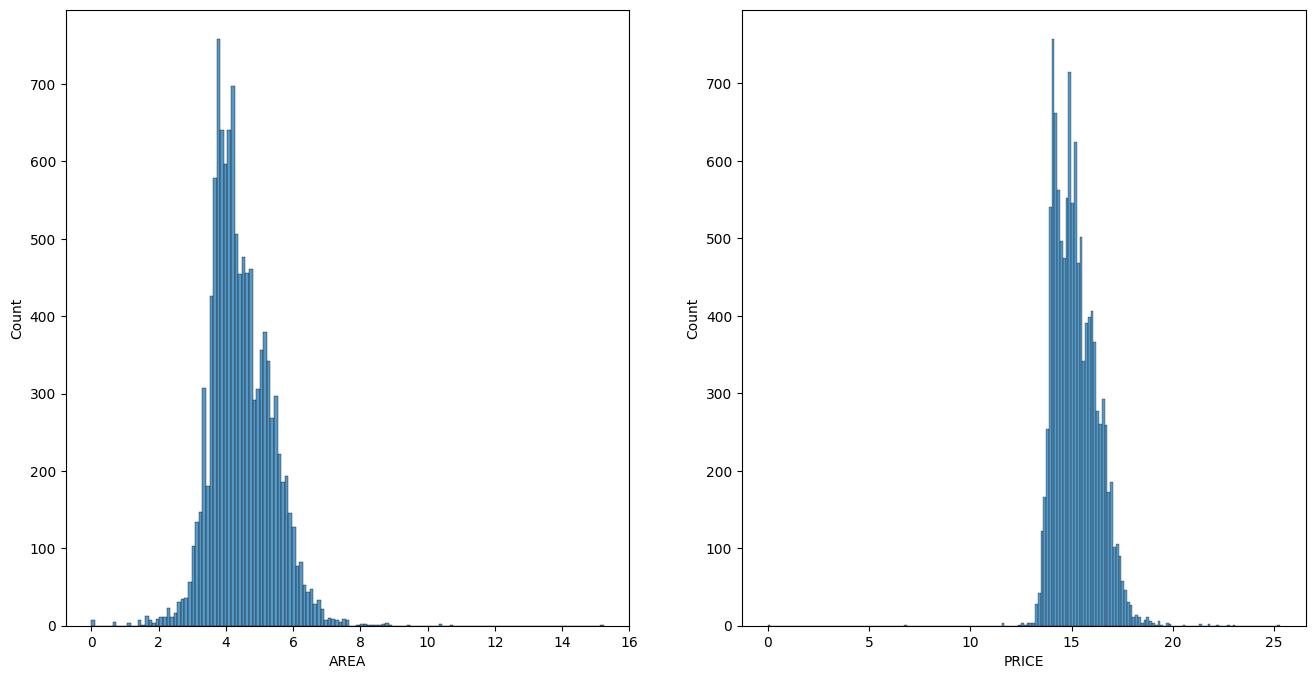

In [14]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC

fig, axes = plt.subplots(1, 2, figsize = (16,8))

sns.histplot(x = np.log(df['AREA']), ax = axes[0])
sns.histplot(x = np.log(df['PRICE']), ax = axes[1])

/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gololias/Documents/Projectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


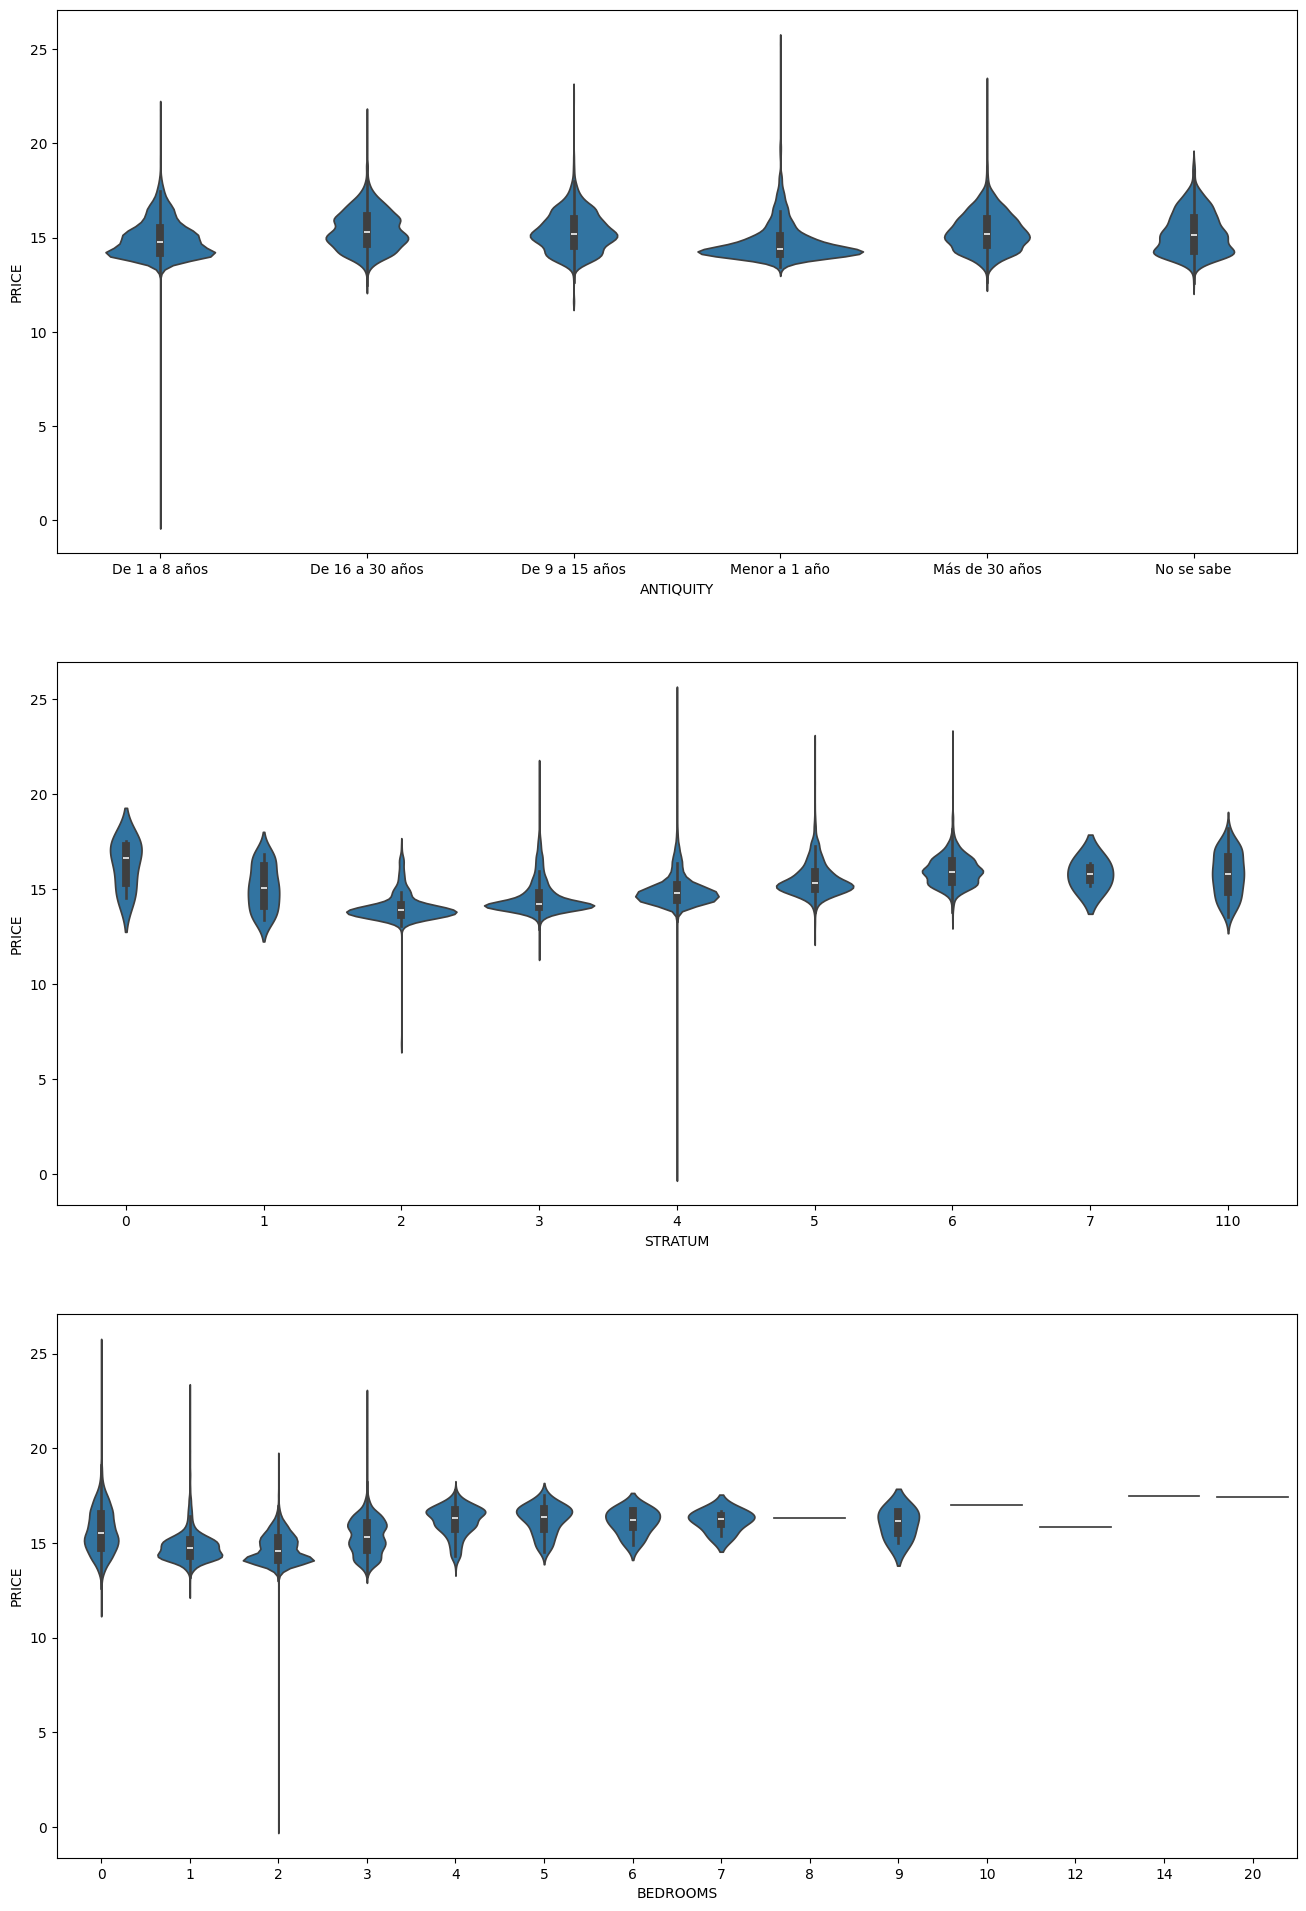

In [15]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC

fig, axes = plt.subplots(len(categorical_features), 1, figsize = (16, 8 * len(categorical_features)))
for i, var in enumerate(categorical_features):
    sns.violinplot(df, x = var, y = np.log(df['PRICE']), ax = axes[i])

In [17]:
df.to_csv('../data/interim/data_v2.csv', index=False, sep=';')